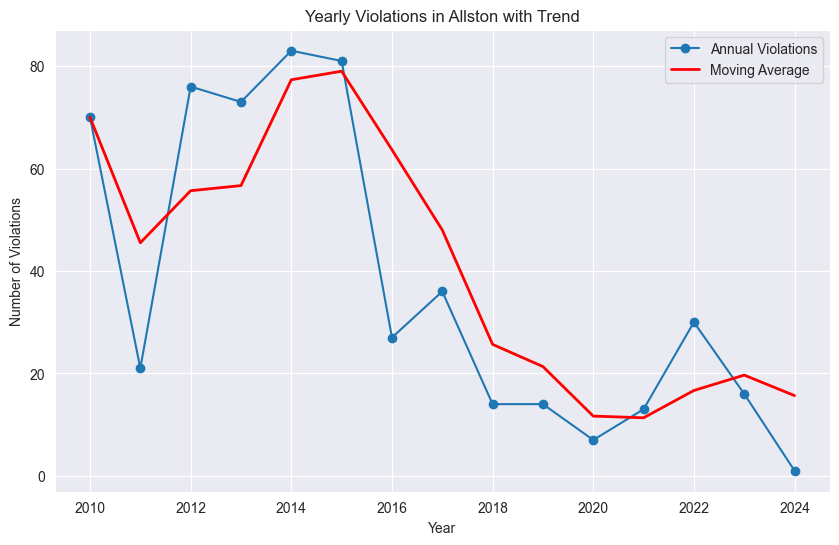

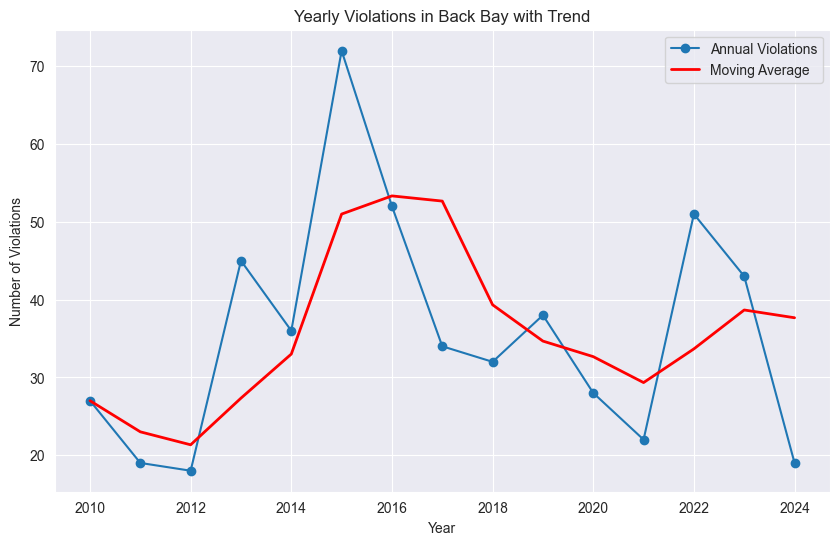

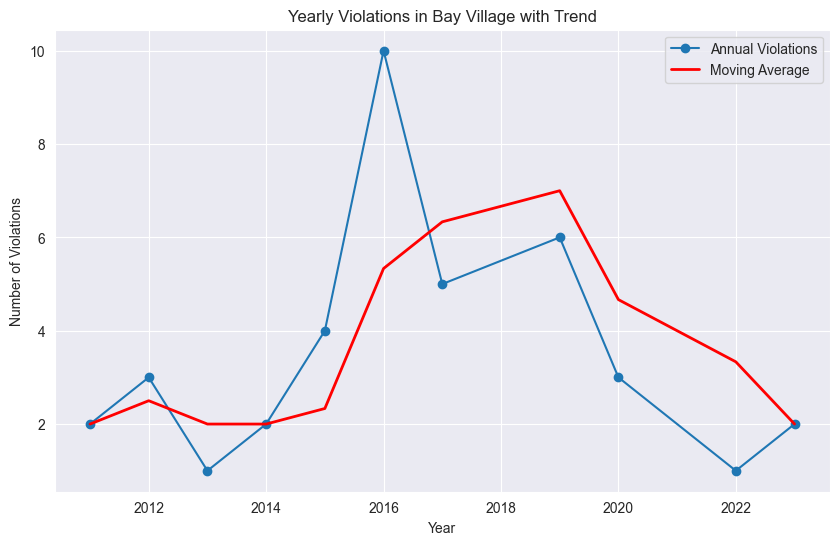

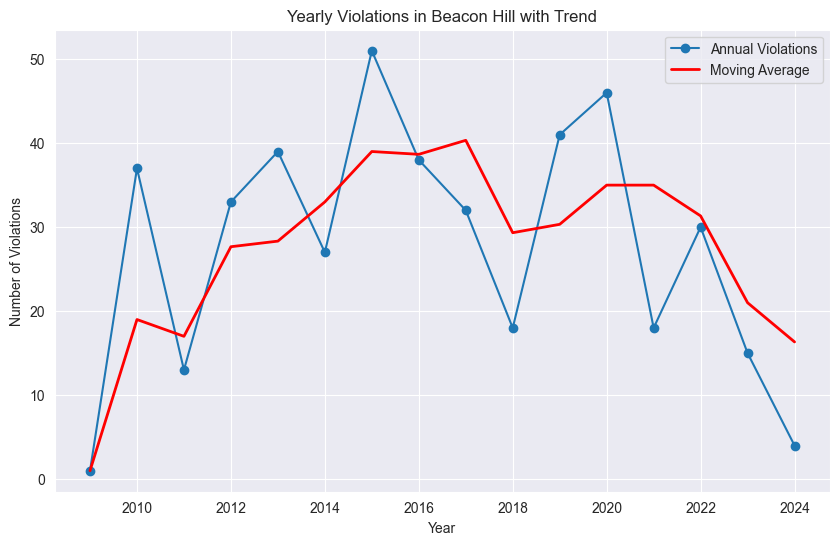

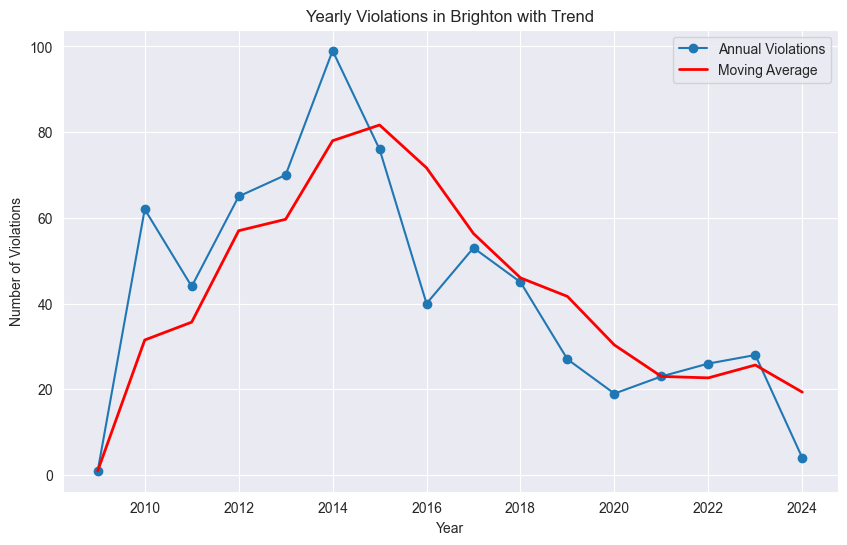

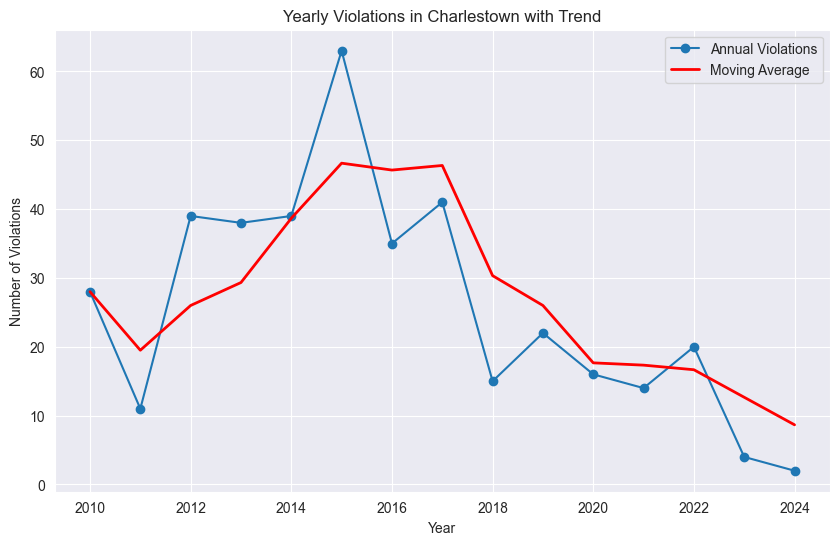

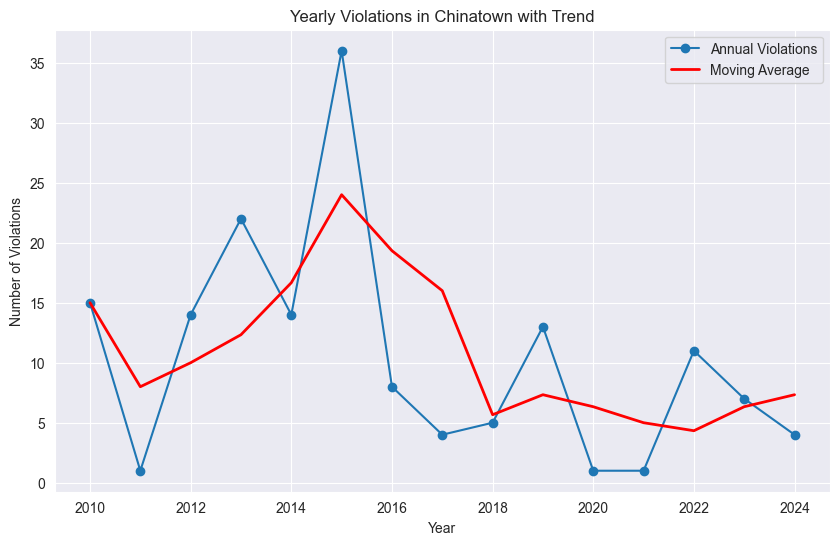

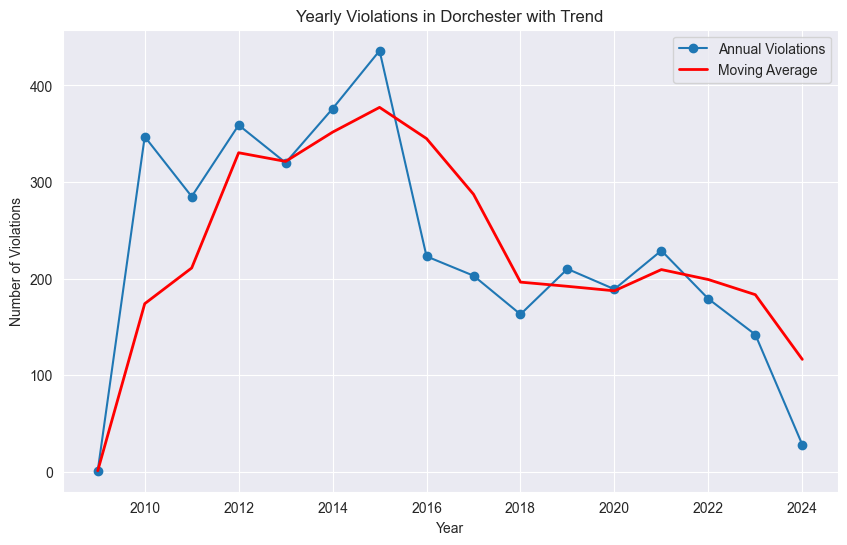

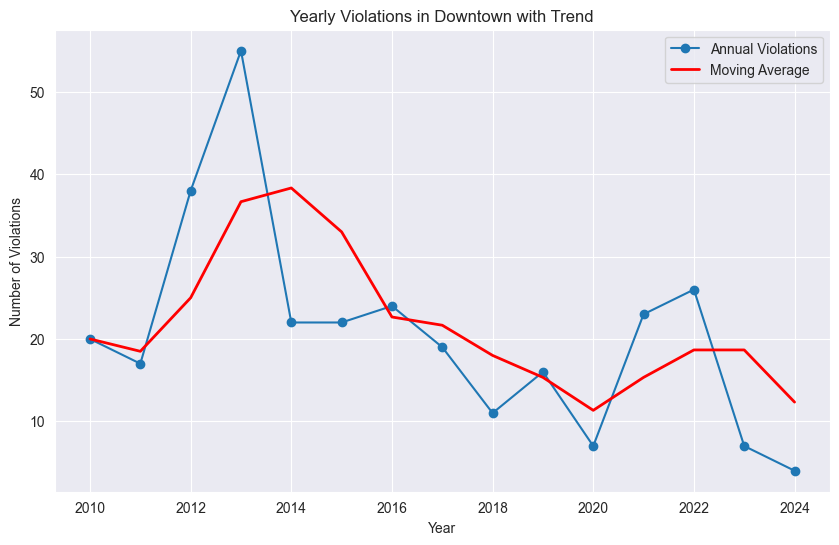

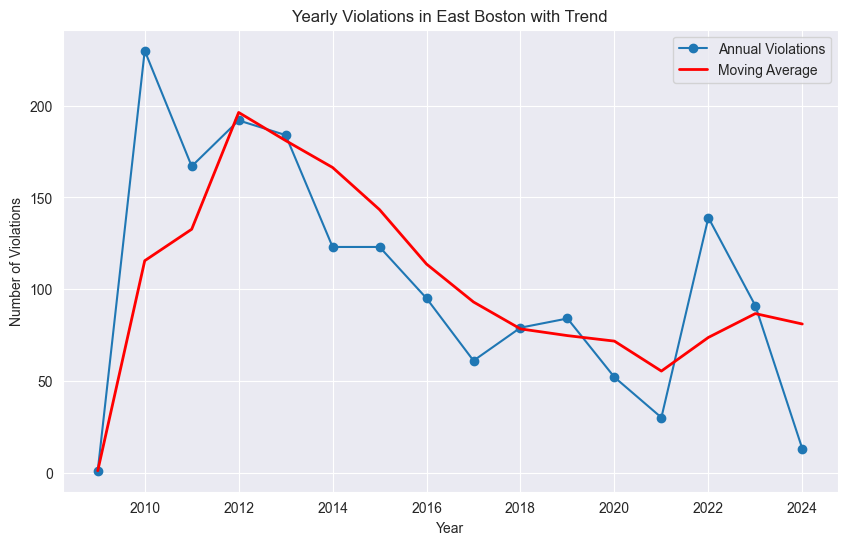

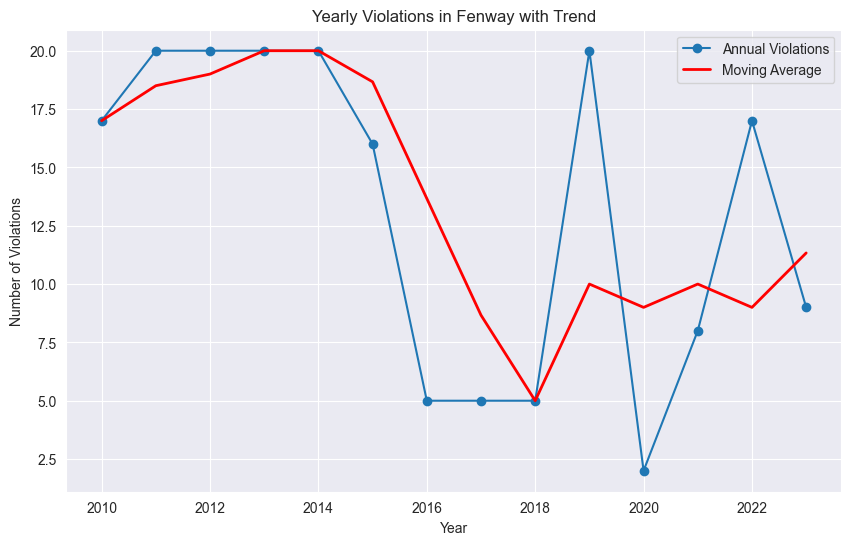

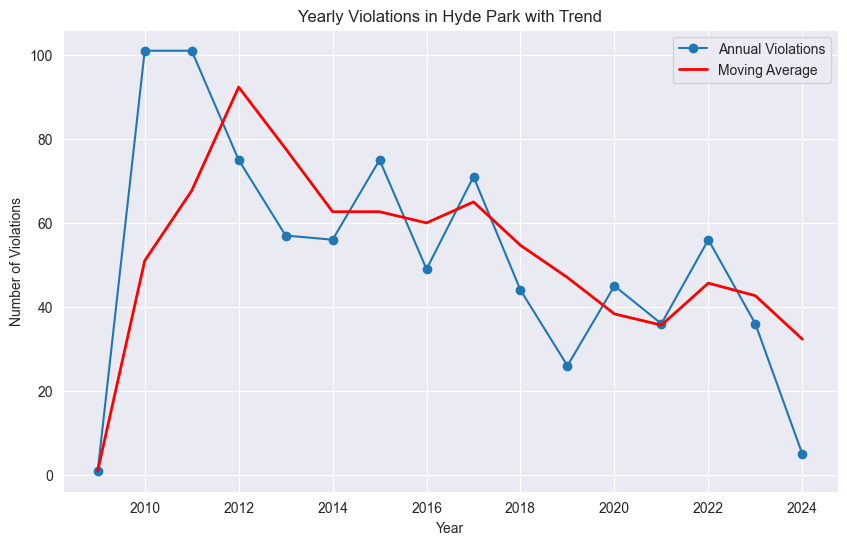

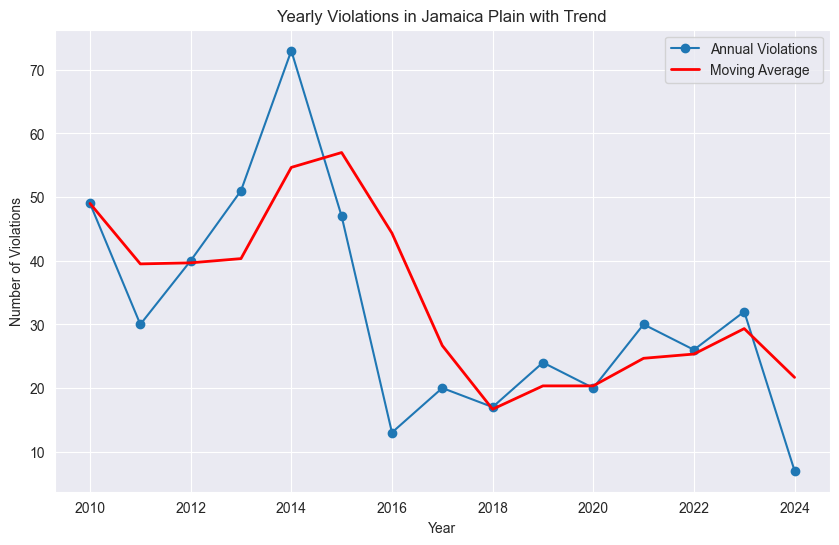

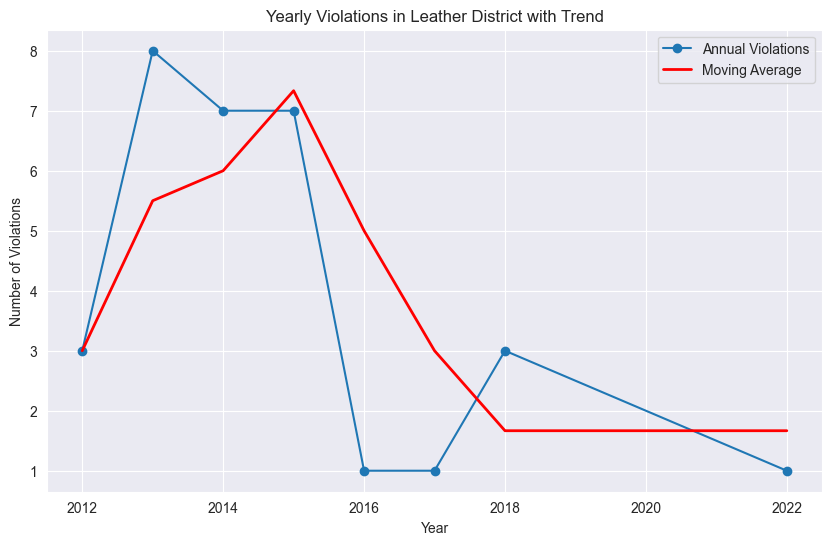

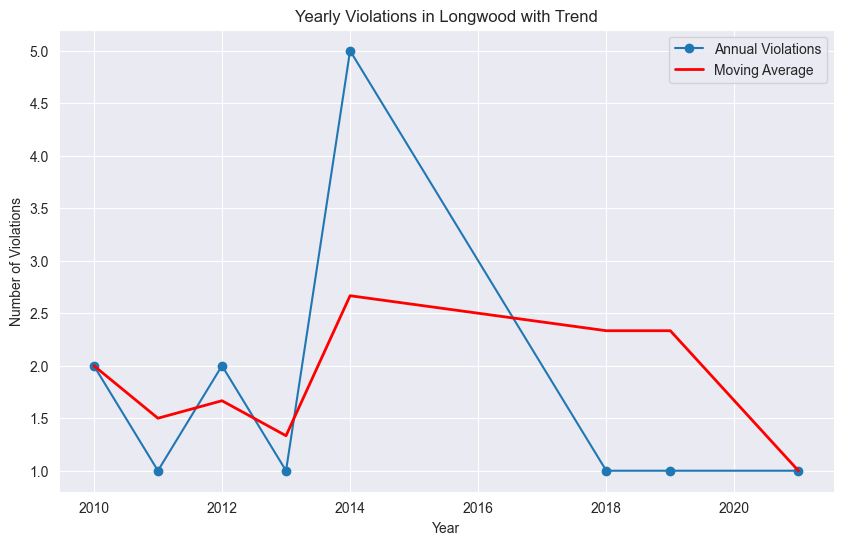

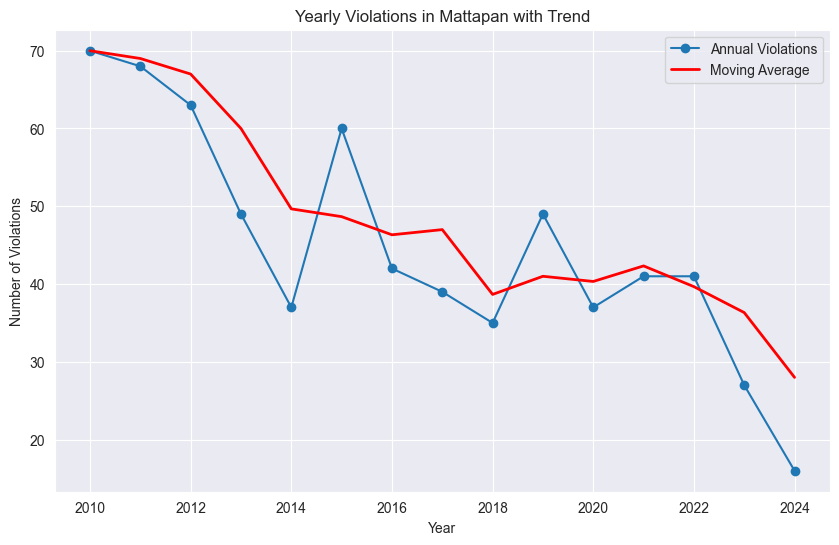

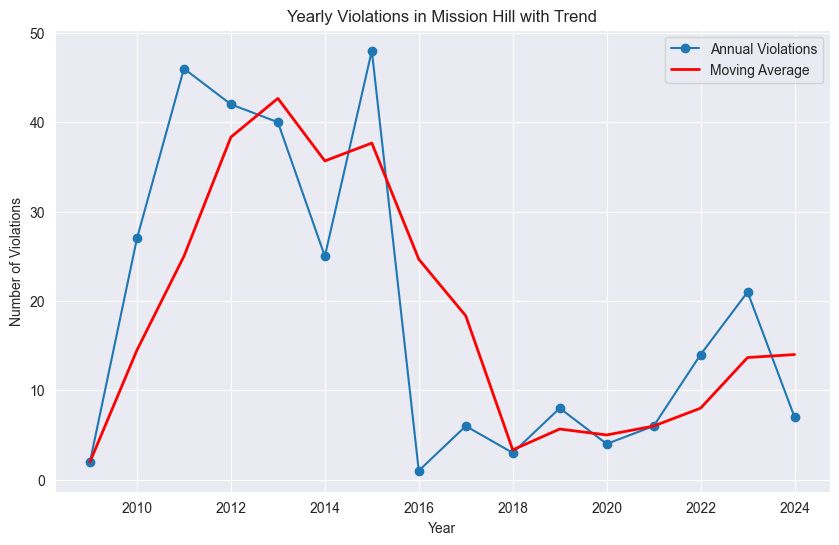

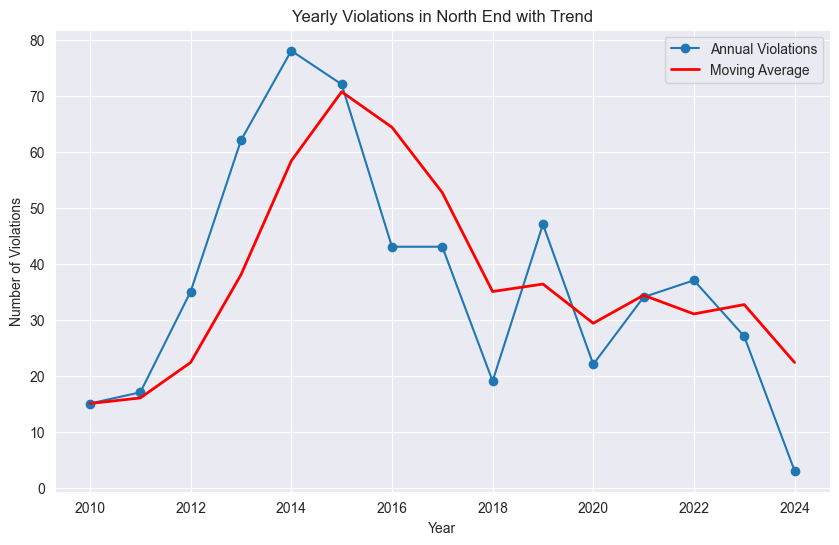

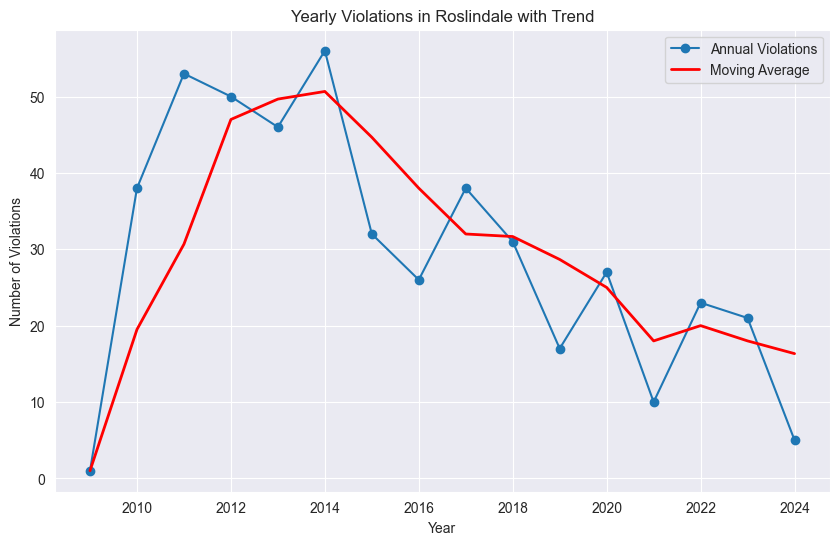

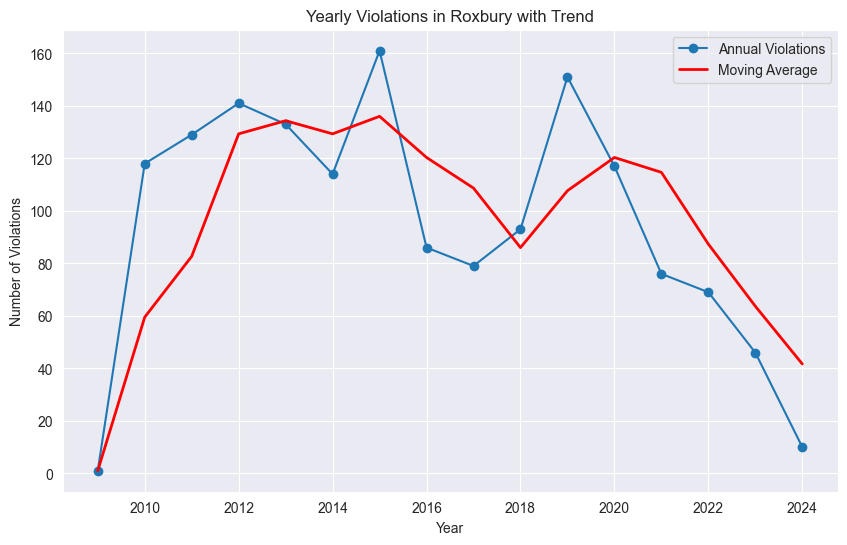

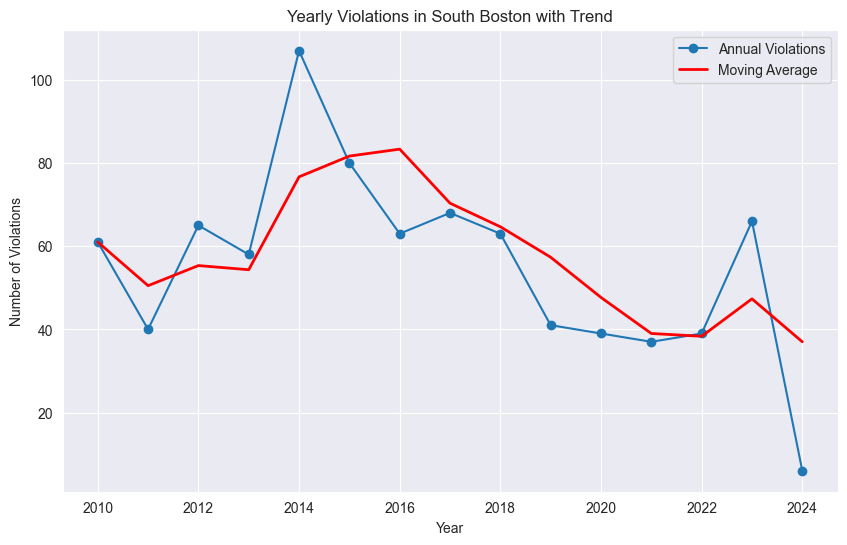

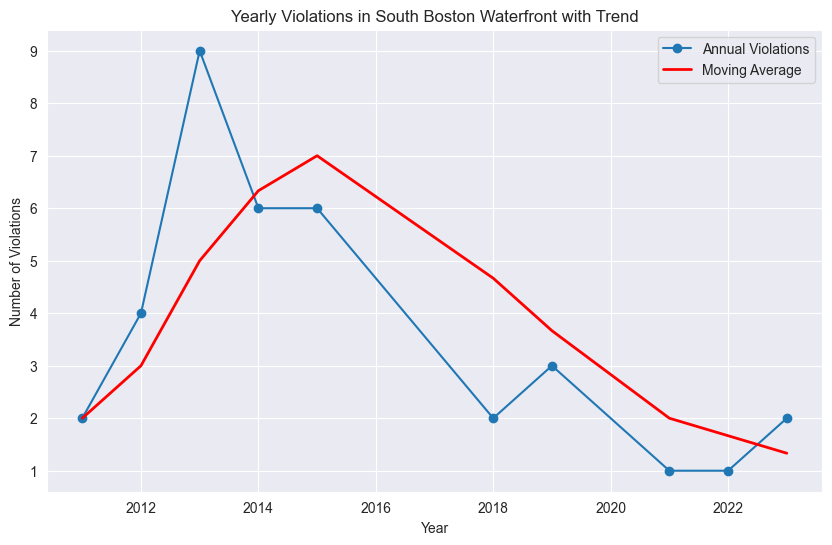

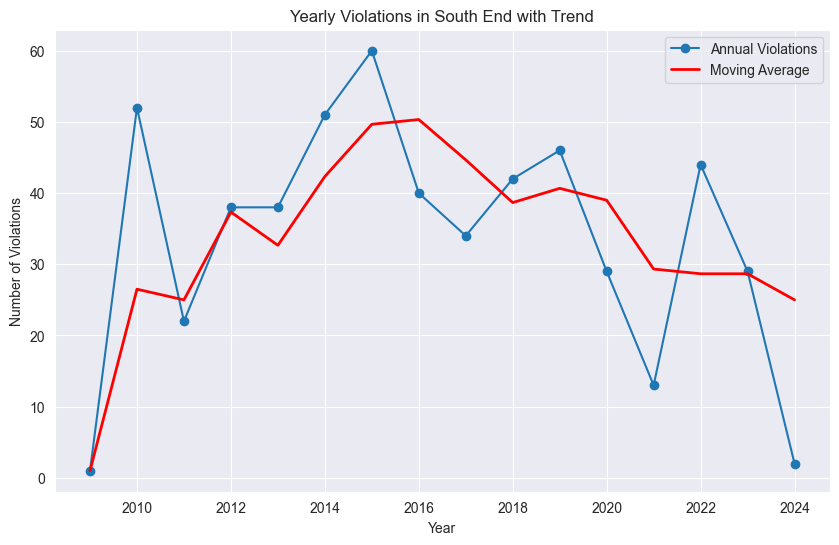

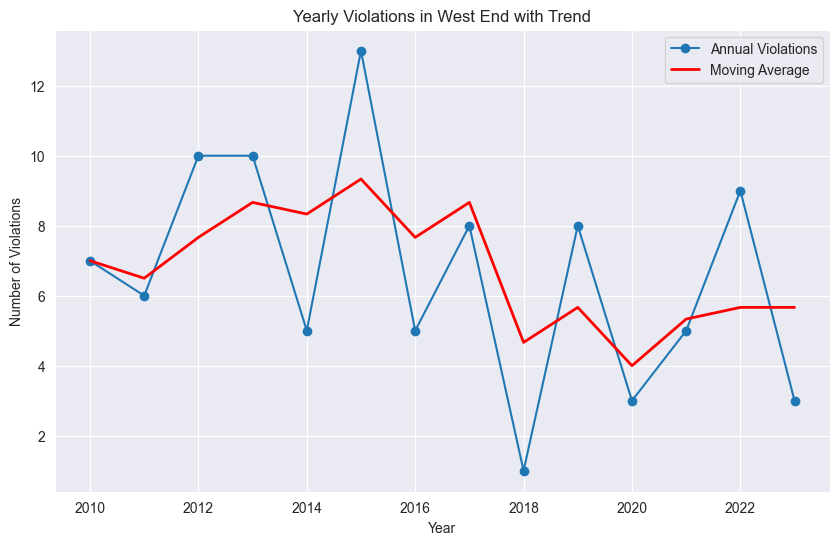

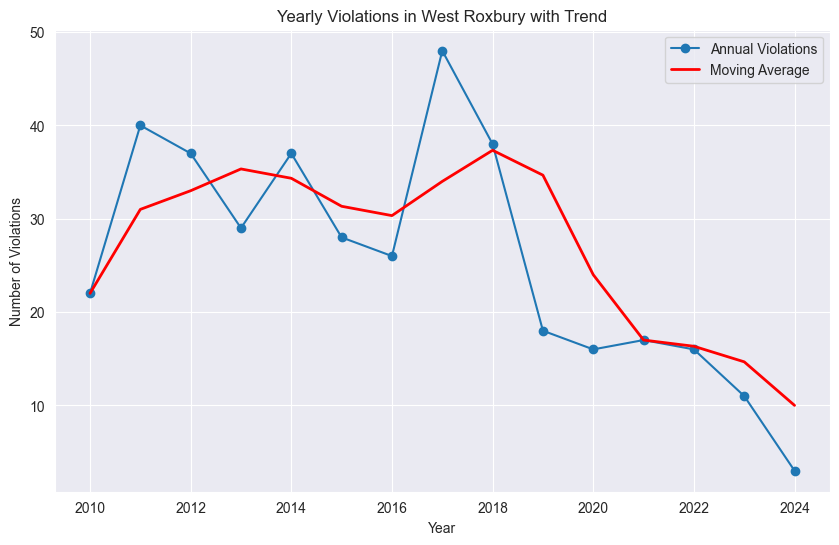

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_path = 'updated_PUBLIC_WORKS_VIOLATIONS.csv'
data = pd.read_csv(data_path)

# Convert 'status_dttm' to datetime format and extract the year
data['status_dttm'] = pd.to_datetime(data['status_dttm'])
data['Year'] = data['status_dttm'].dt.year

# Group data by neighborhood and year, calculate the number of violations
grouped_data = data.groupby(['Neighborhood', 'Year']).size().reset_index(name='Violations')

# Generate time series plots for each neighborhood, including a moving average to show trends
for neighborhood in grouped_data['Neighborhood'].unique():
    plt.figure(figsize=(10, 6))
    neighborhood_data = grouped_data[grouped_data['Neighborhood'] == neighborhood]

    # Sort data to ensure years are in sequence
    neighborhood_data = neighborhood_data.sort_values('Year')

    # Plot the original data line
    plt.plot(neighborhood_data['Year'], neighborhood_data['Violations'], marker='o', label='Annual Violations')

    # Calculate and plot a moving average for trend visualization
    neighborhood_data['Moving Average'] = neighborhood_data['Violations'].rolling(window=3, min_periods=1).mean()
    plt.plot(neighborhood_data['Year'], neighborhood_data['Moving Average'], marker='', linestyle='-', linewidth=2, color='red', label='Moving Average')

    plt.title(f'Yearly Violations in {neighborhood} with Trend')
    plt.xlabel('Year')
    plt.ylabel('Number of Violations')
    plt.legend()
    plt.grid(True)
    plt.show()  # Display the plot


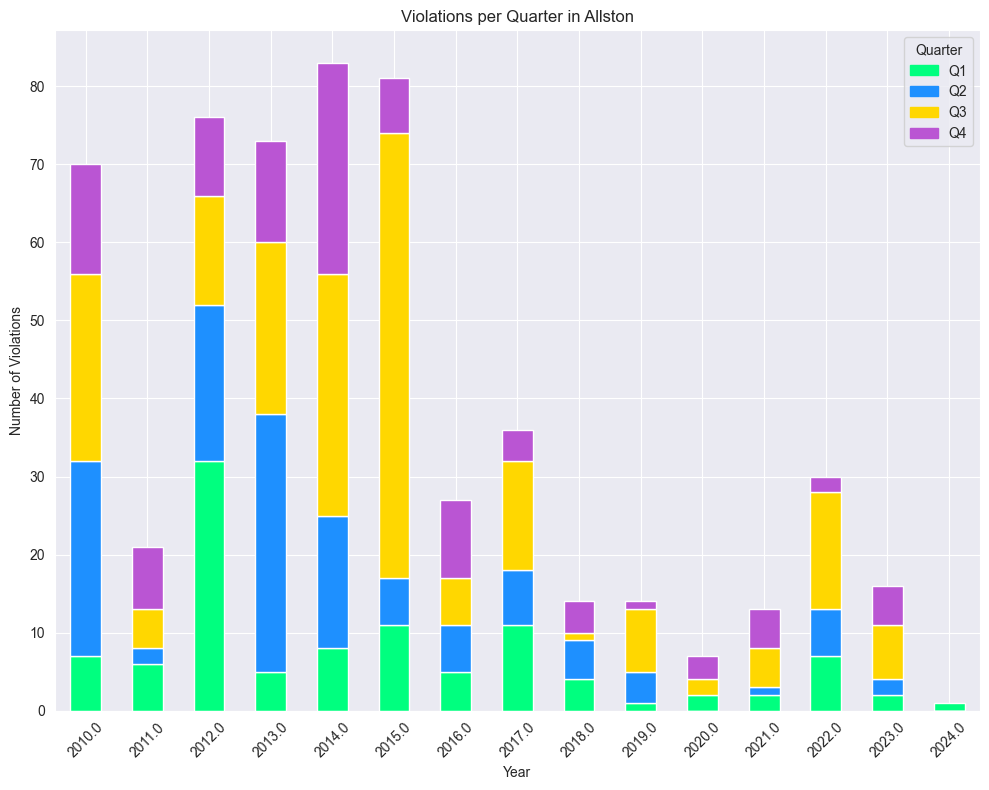

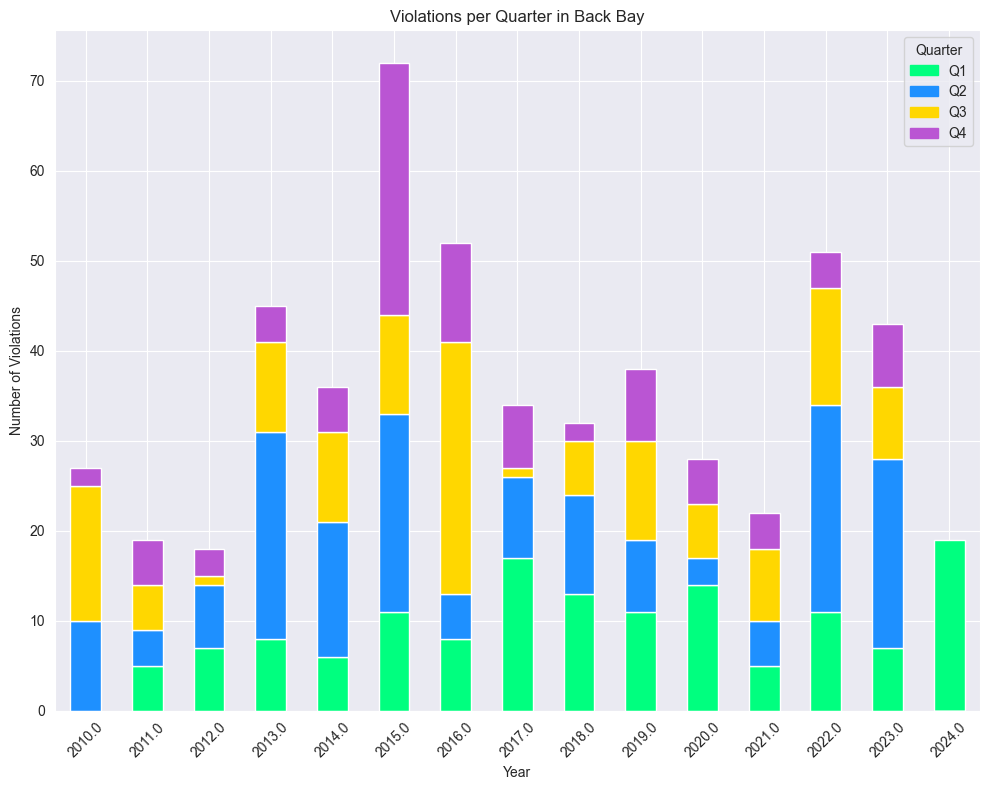

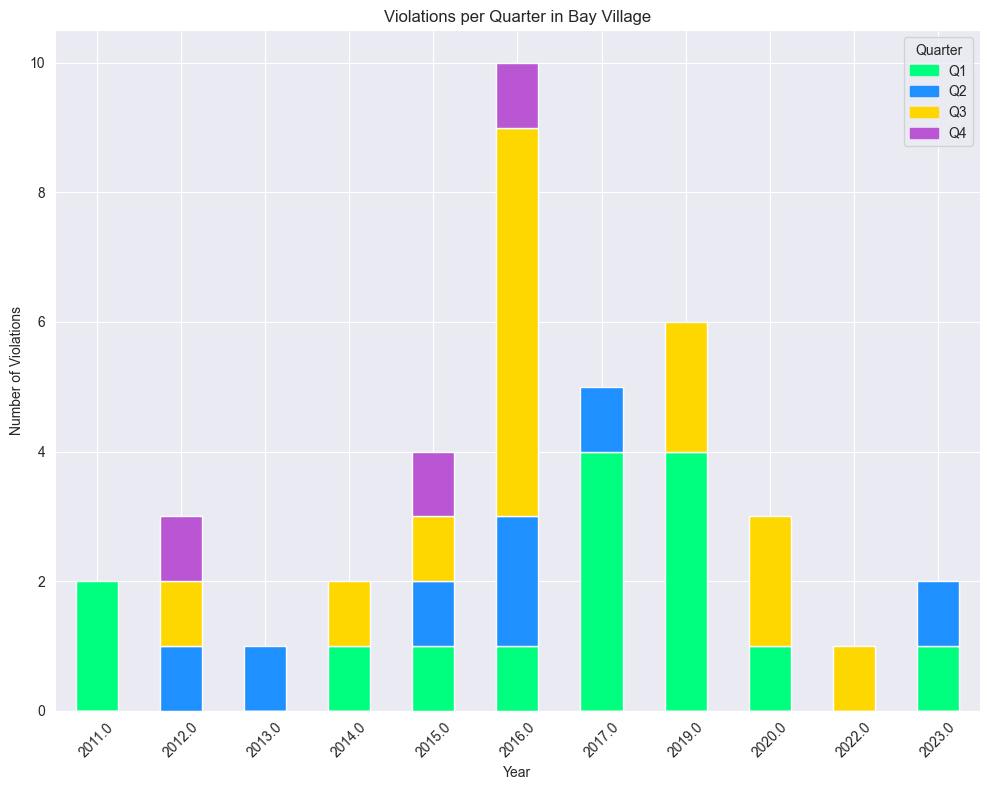

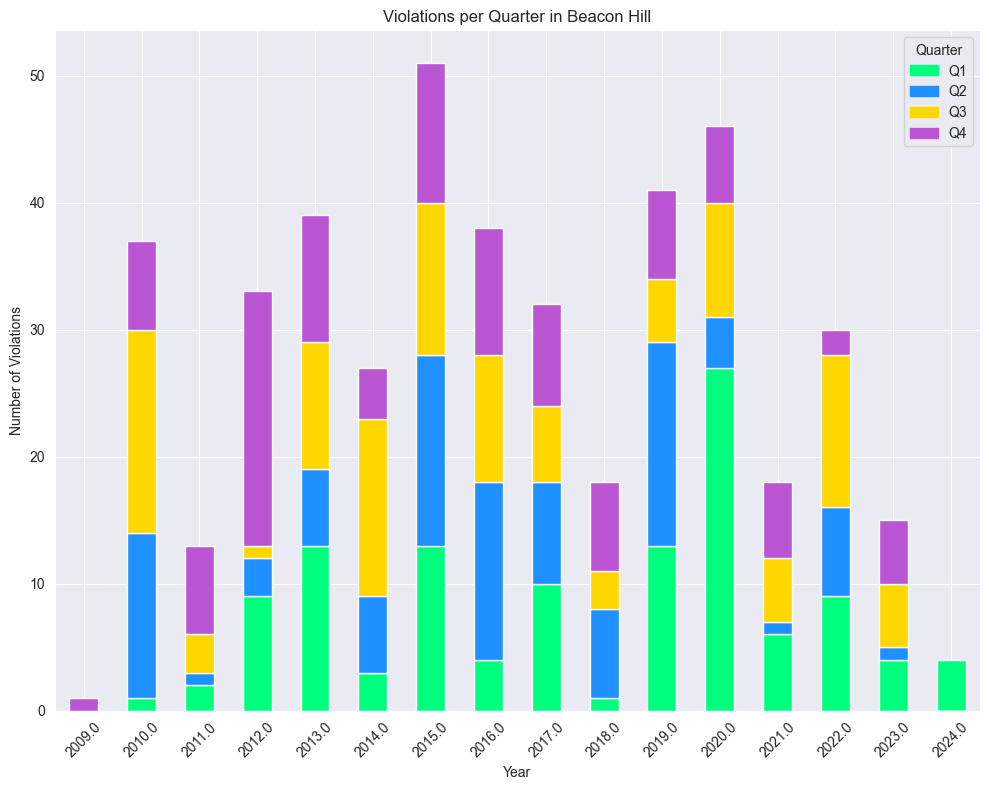

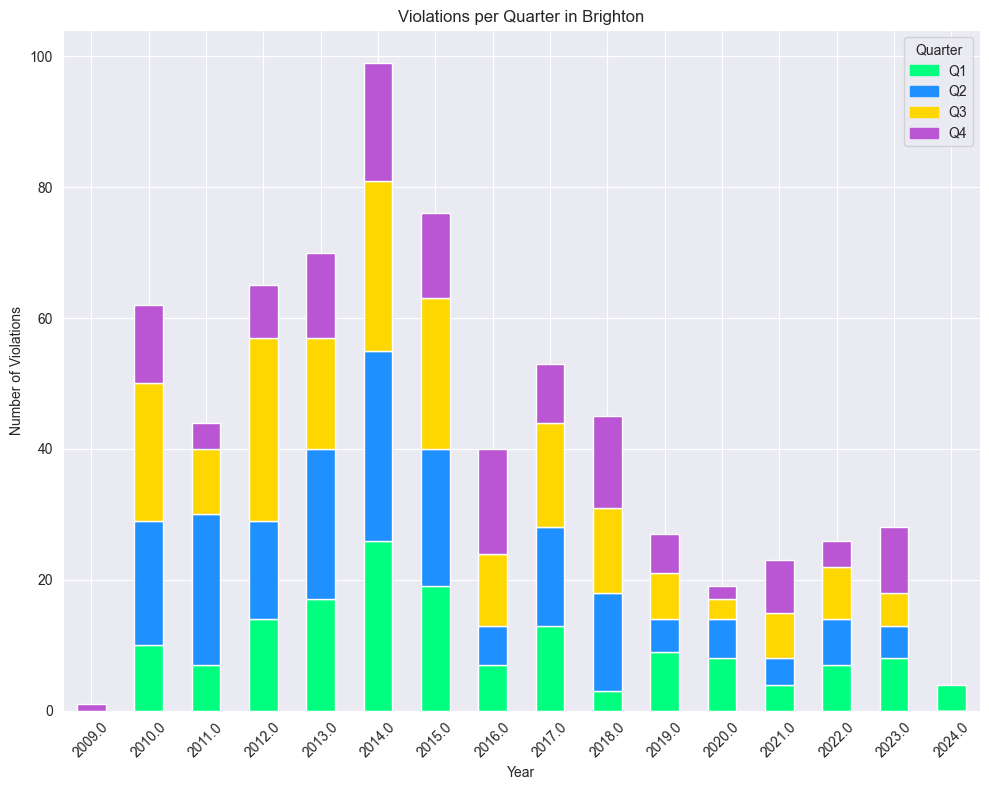

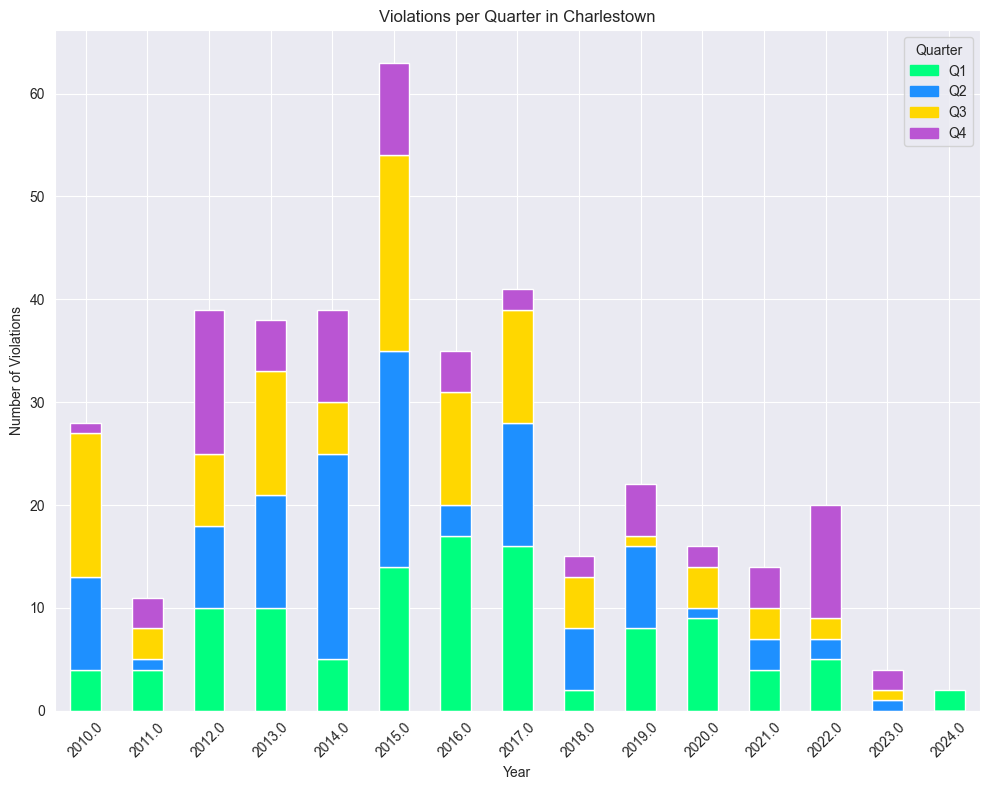

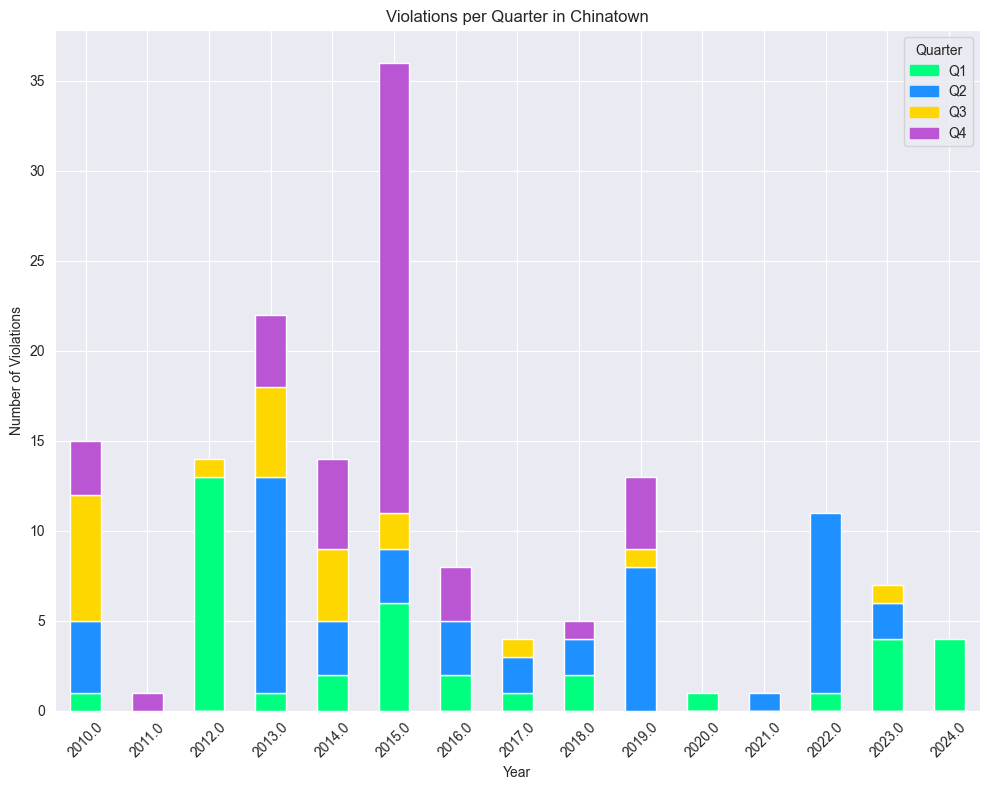

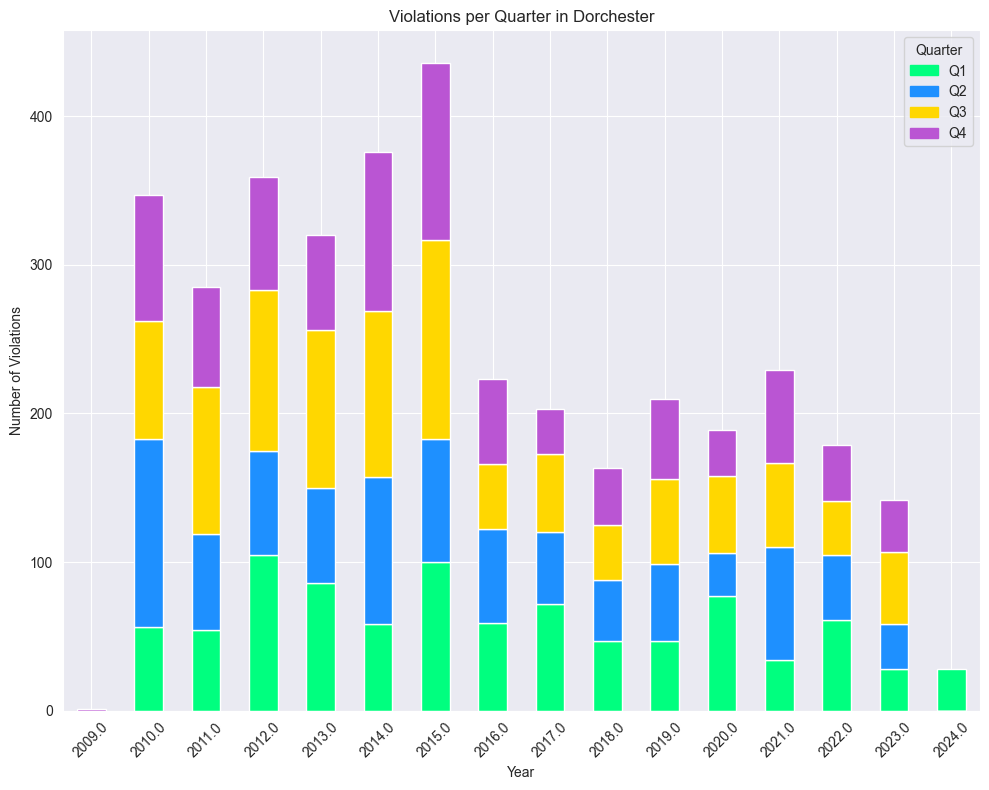

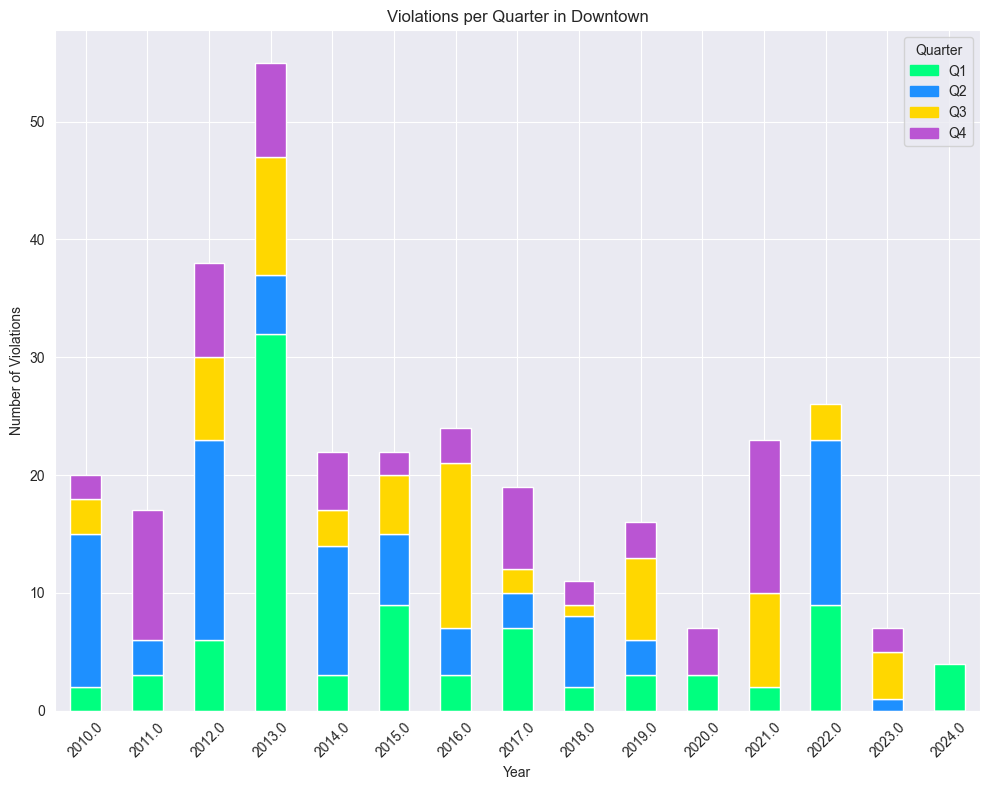

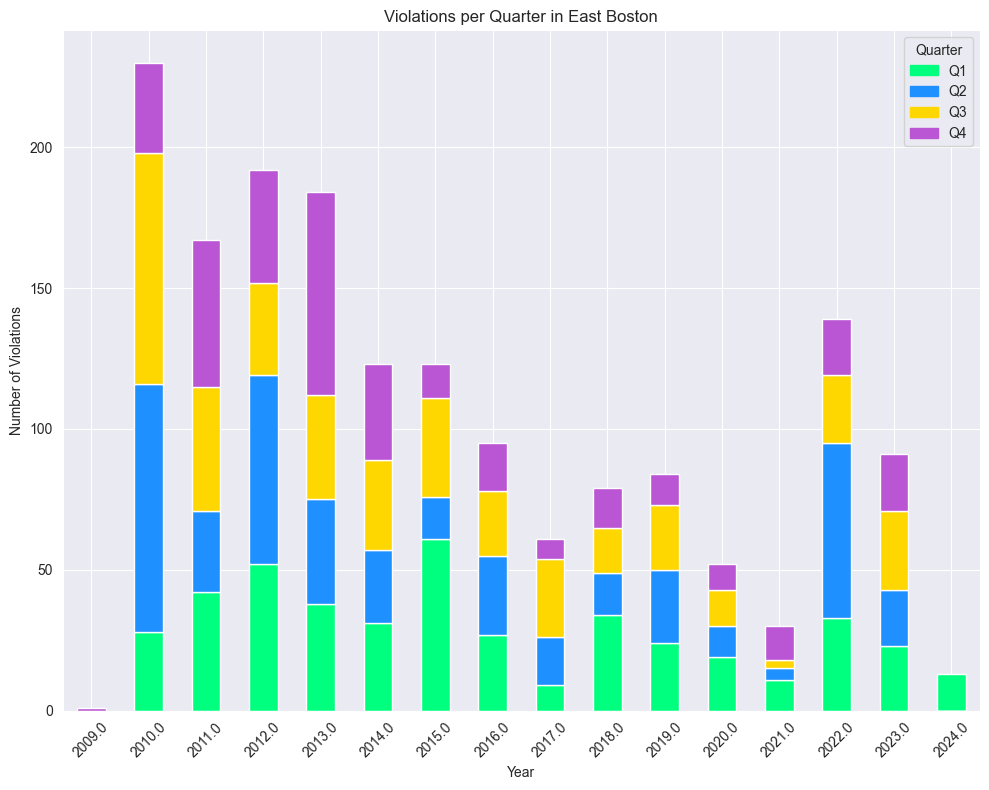

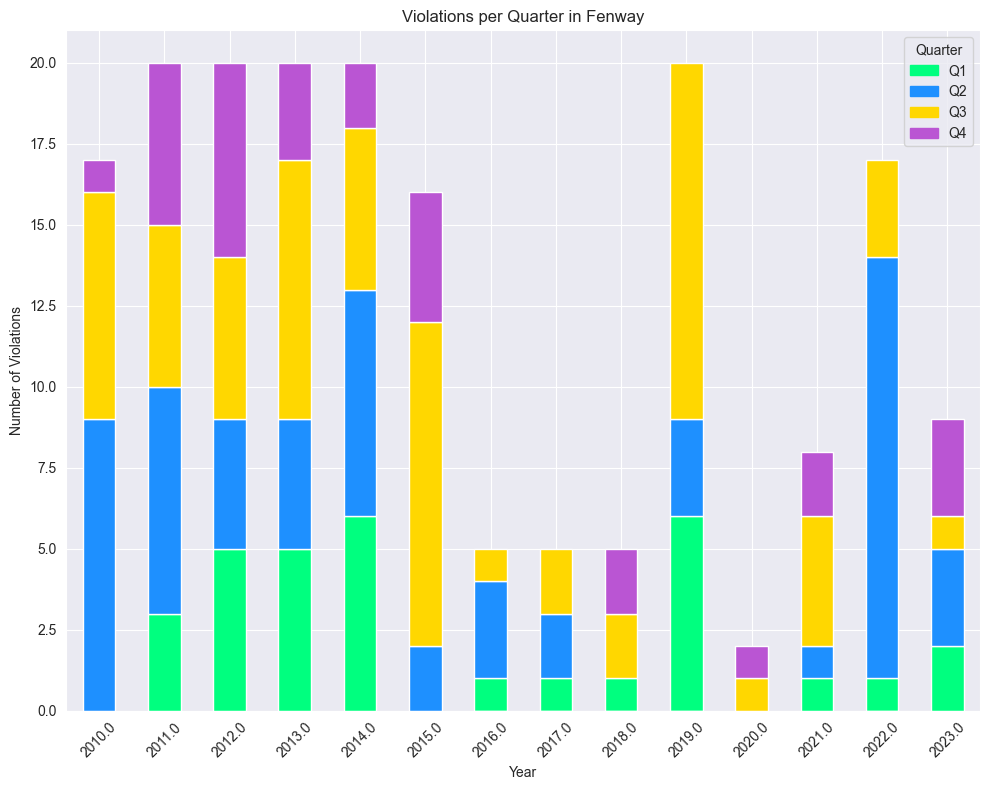

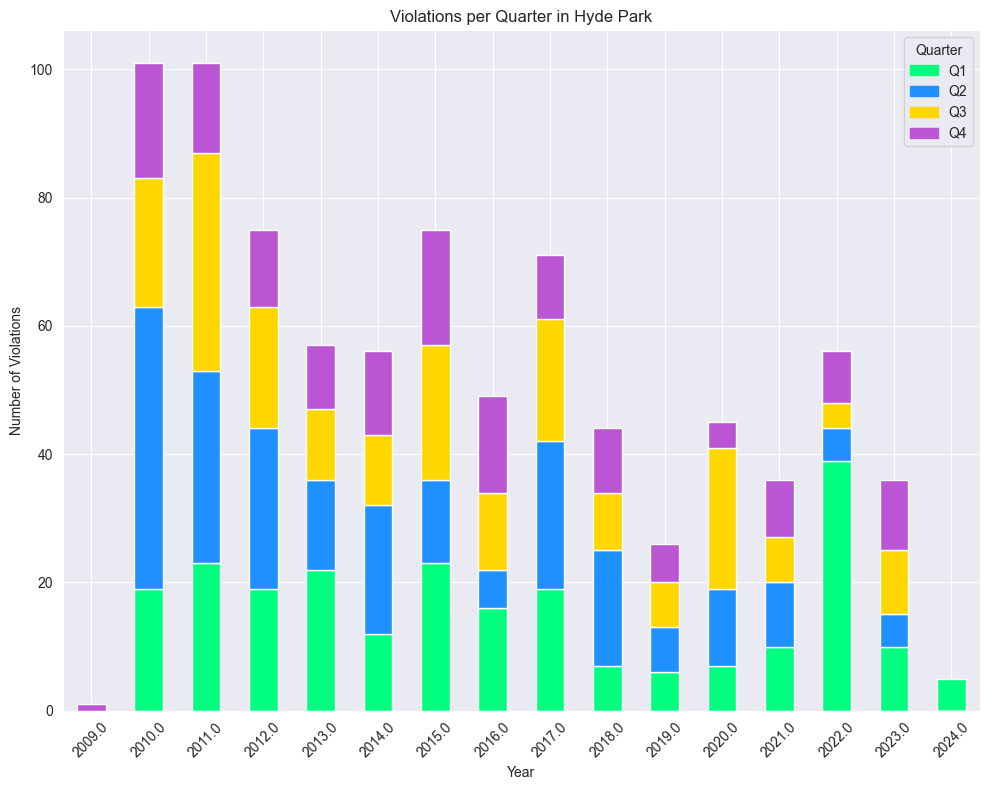

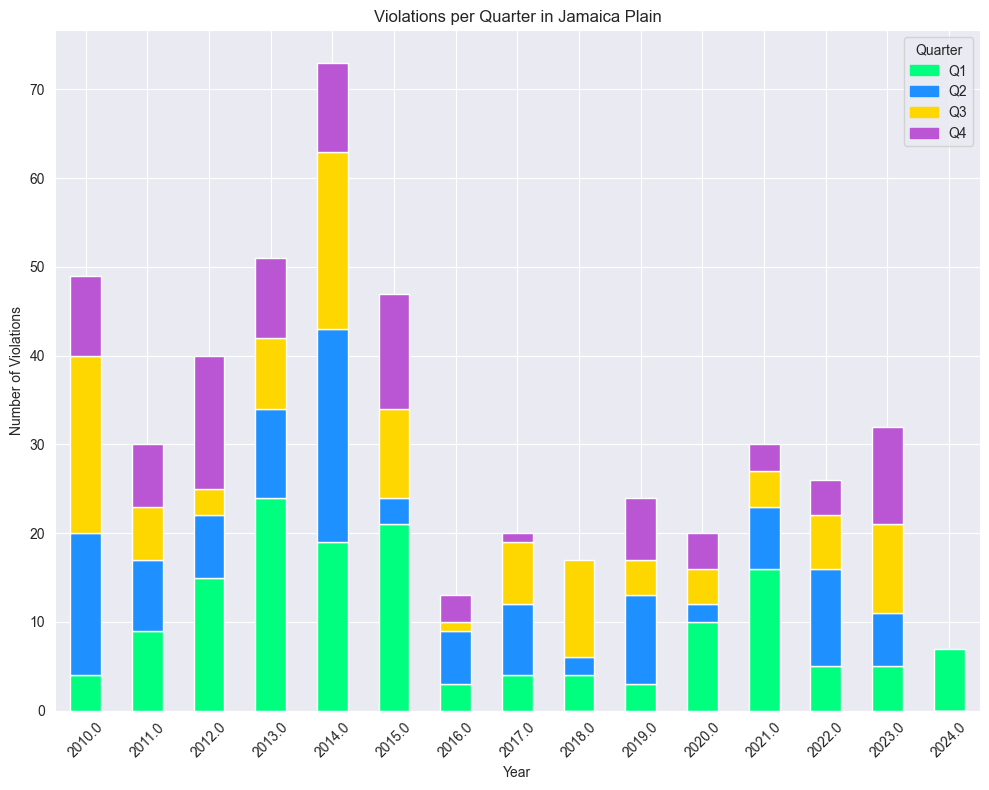

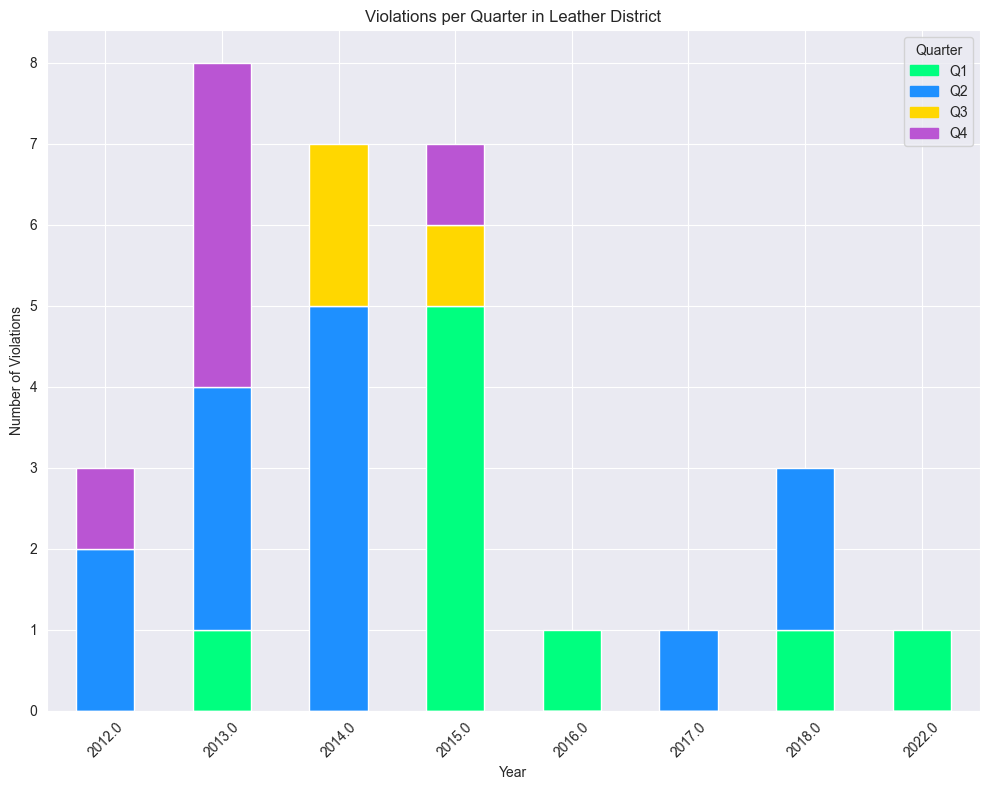

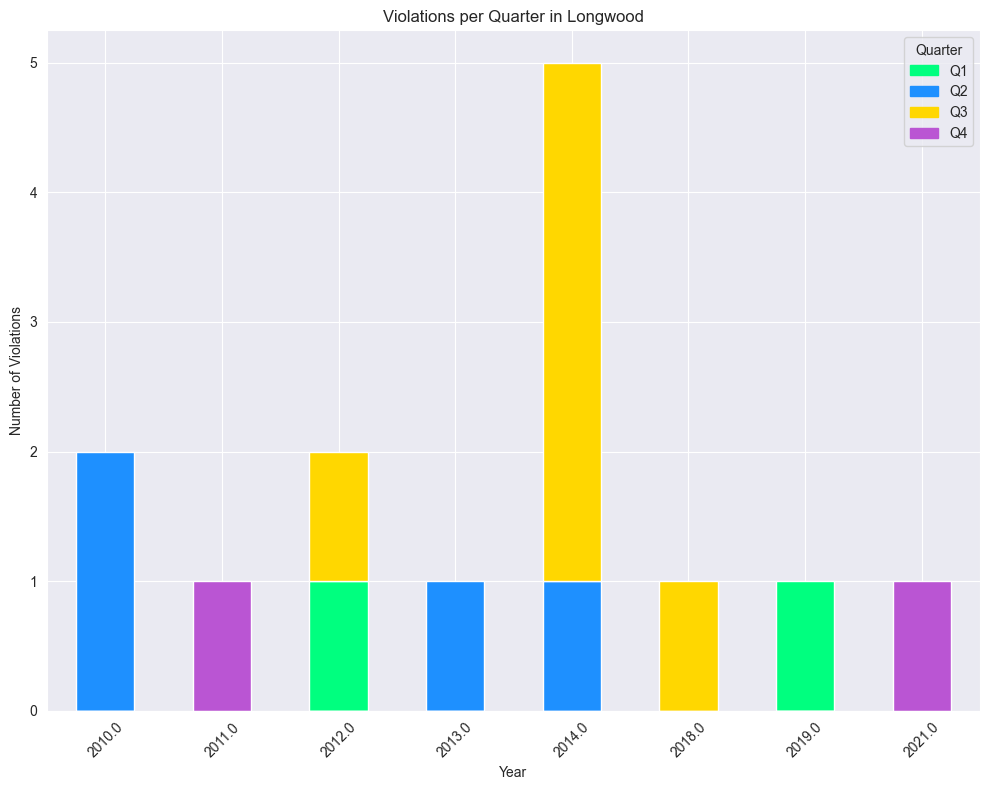

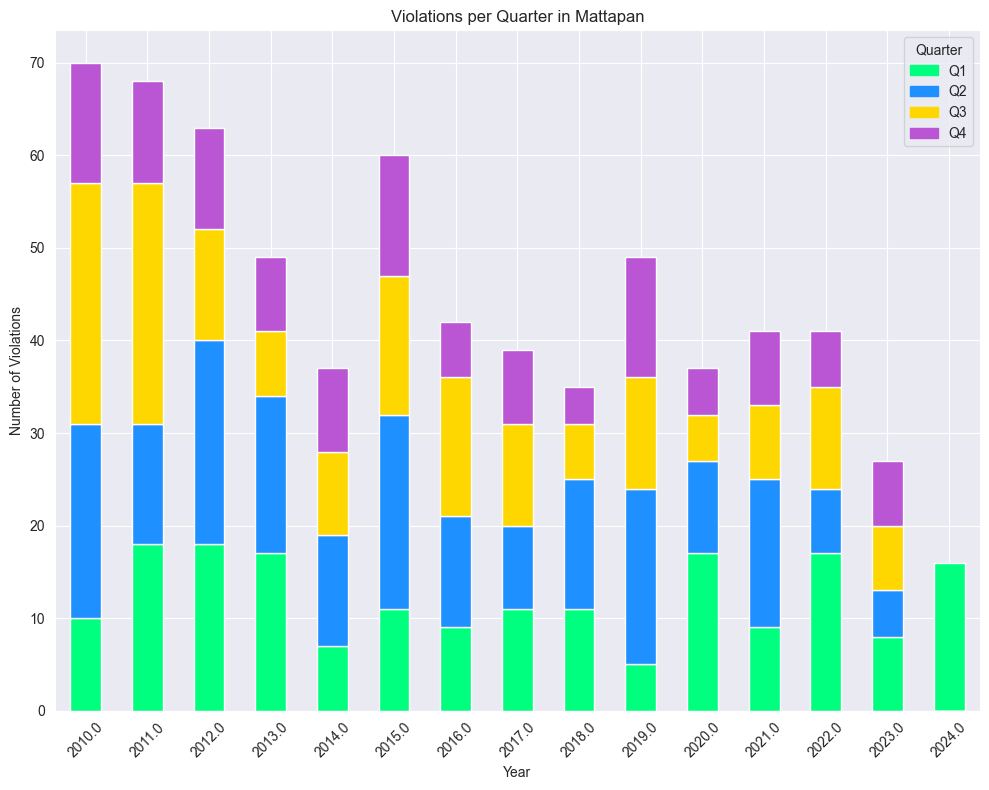

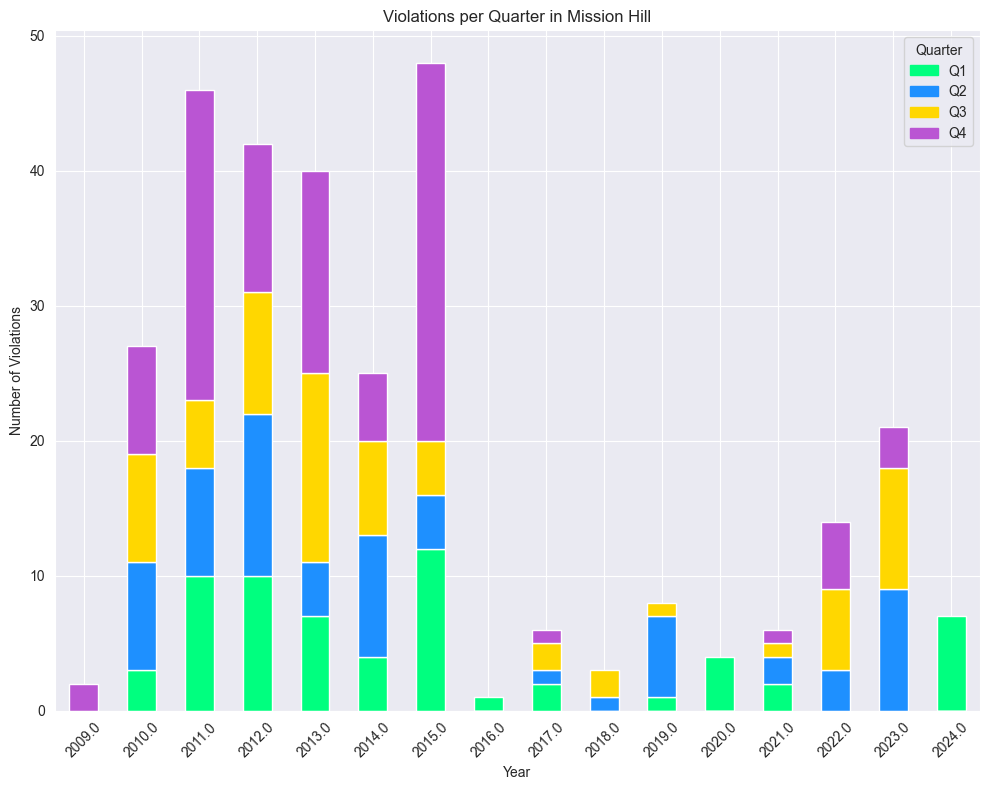

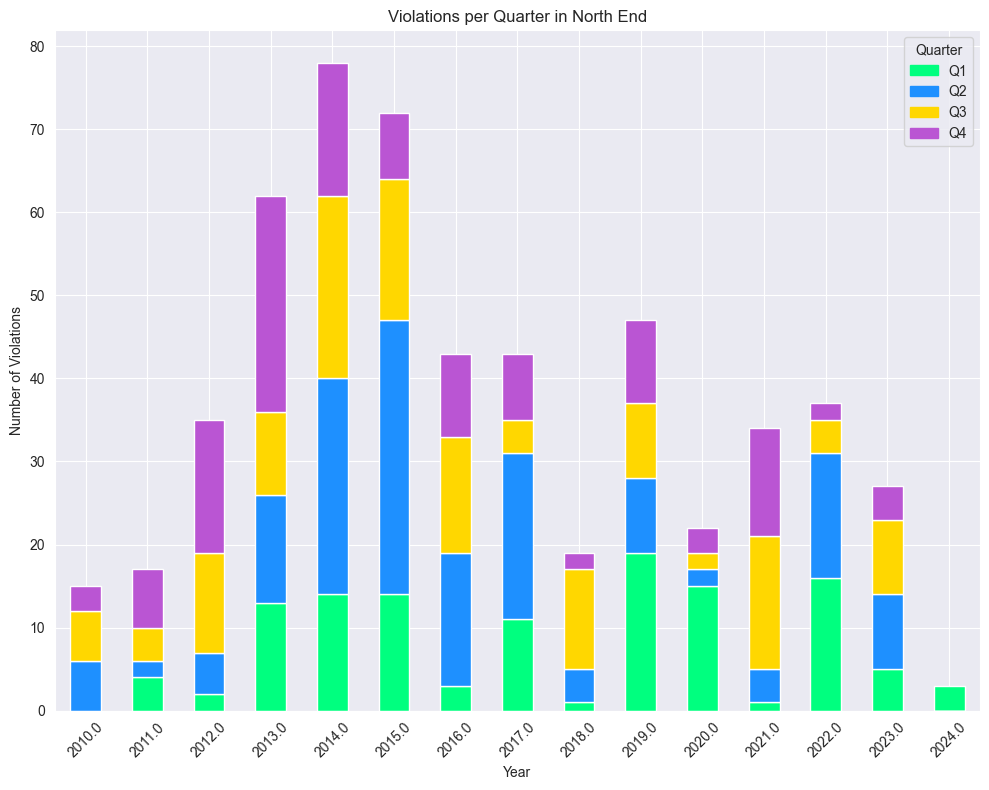

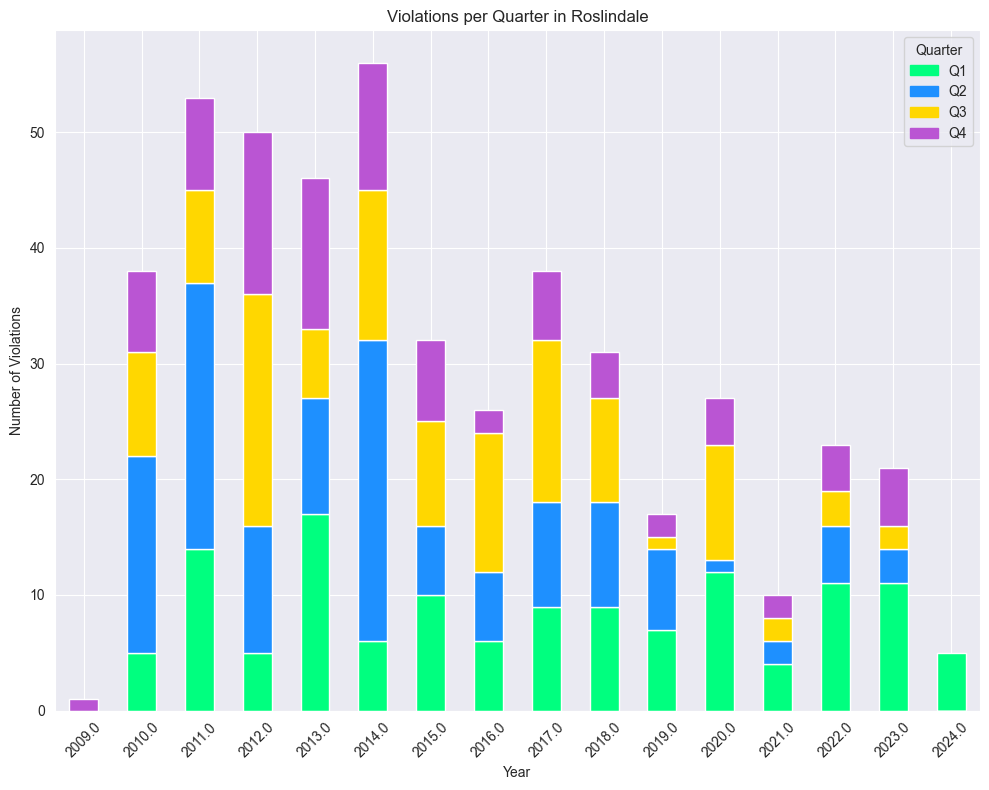

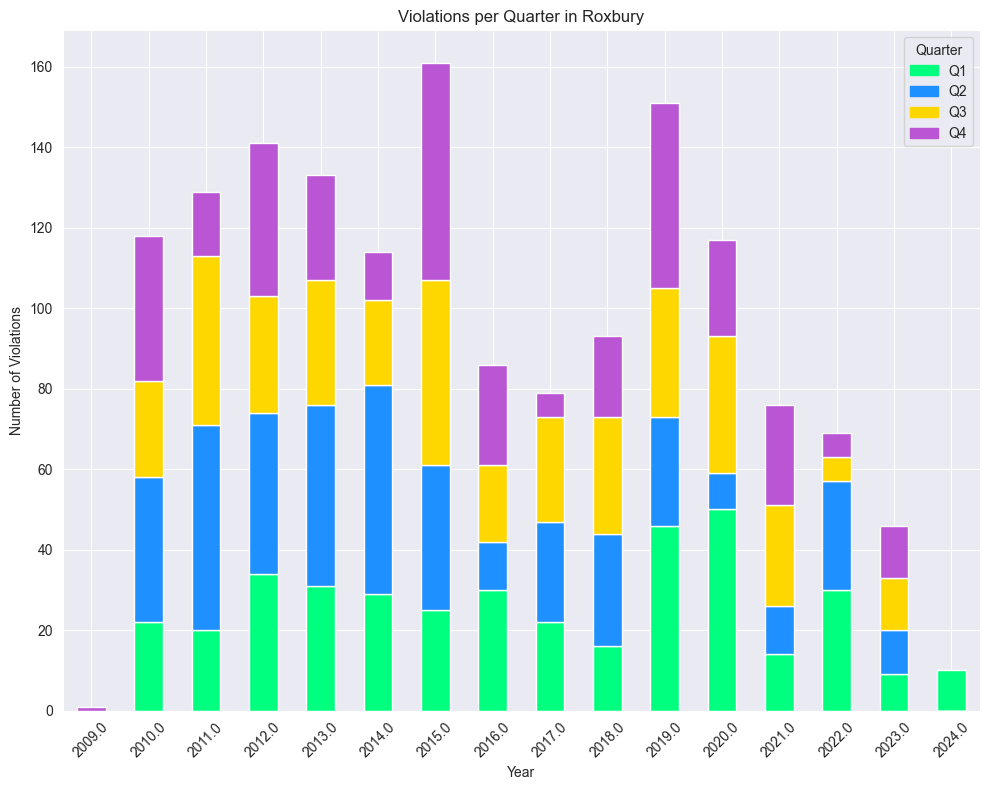

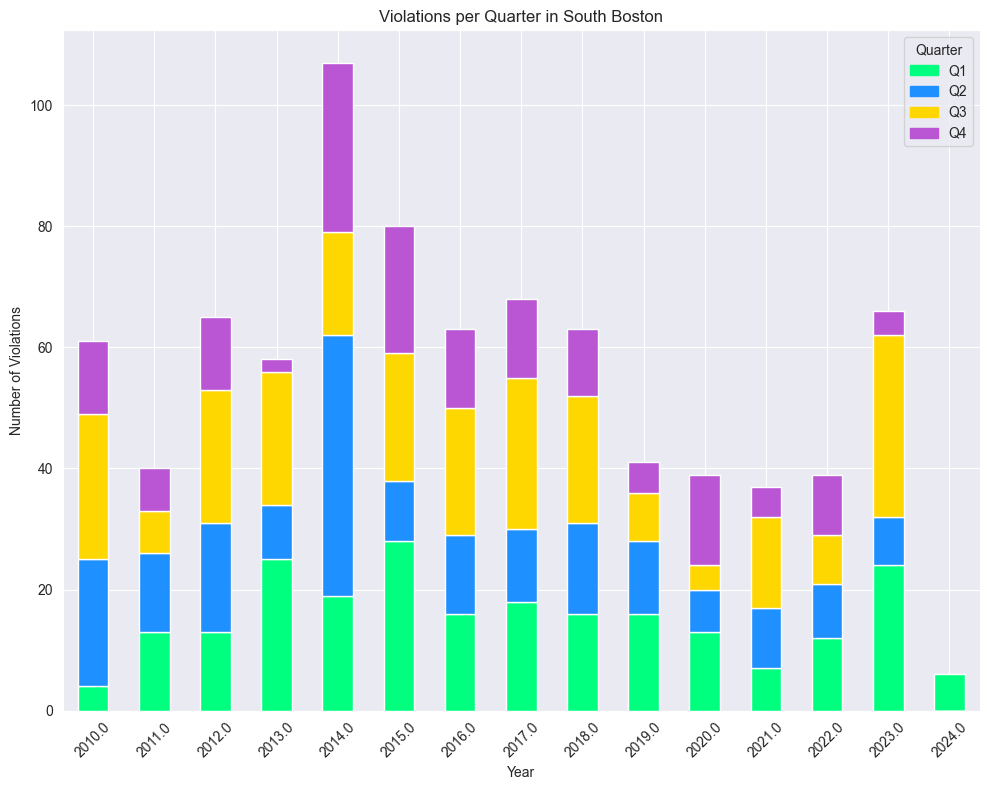

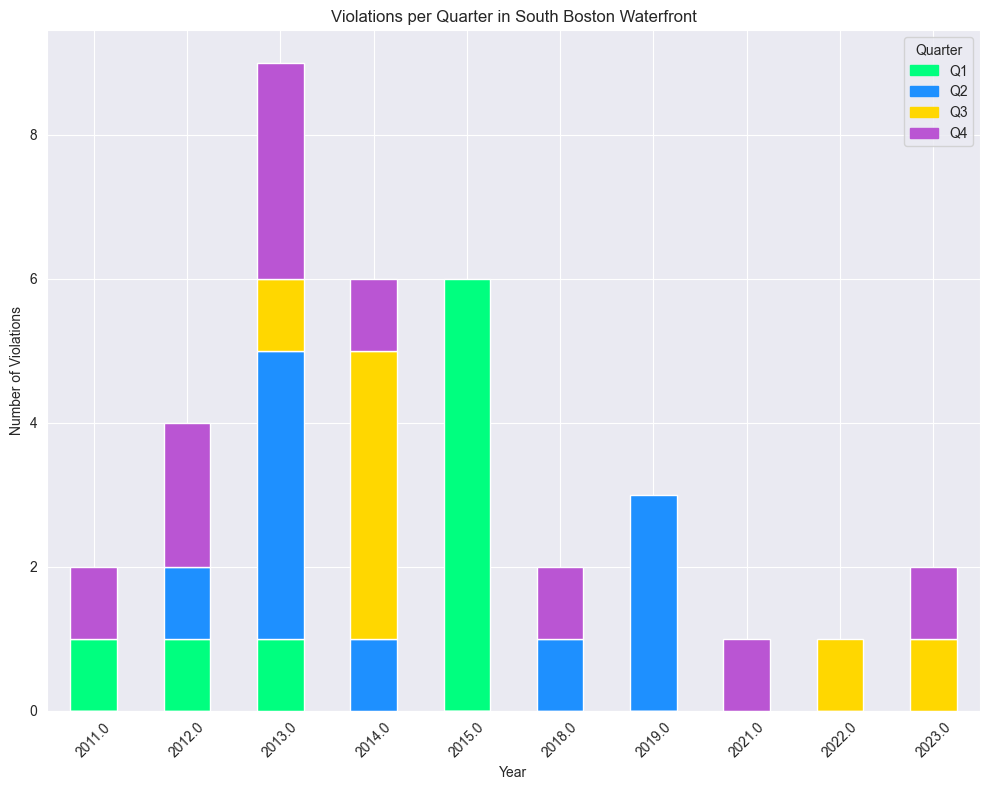

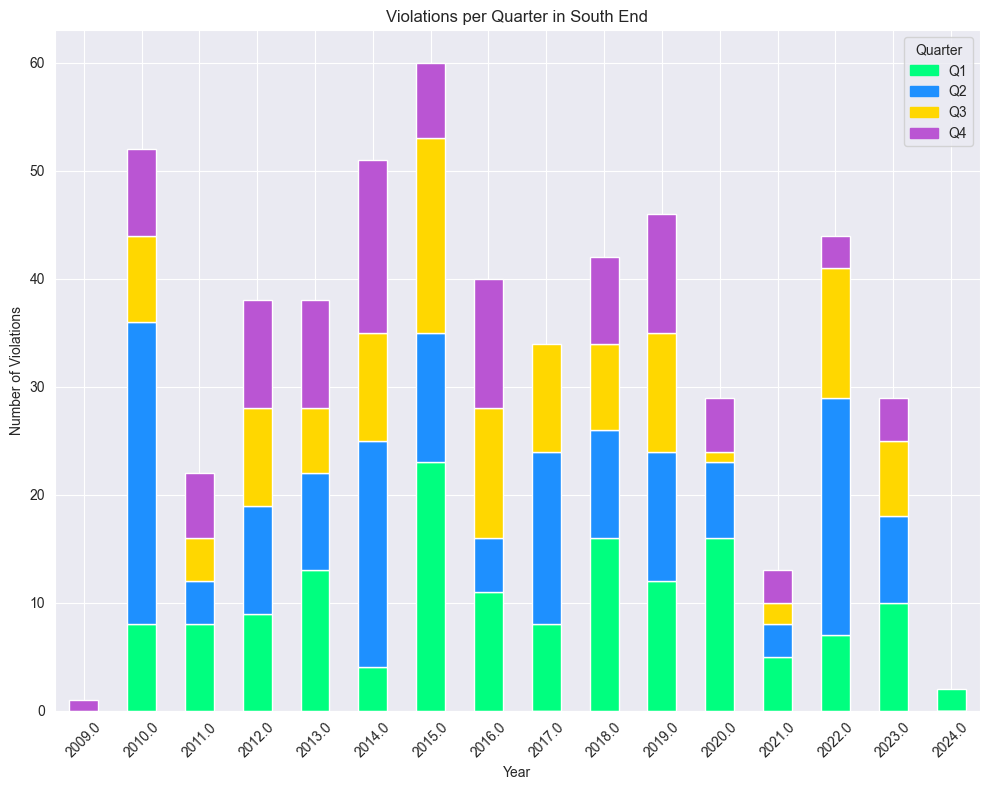

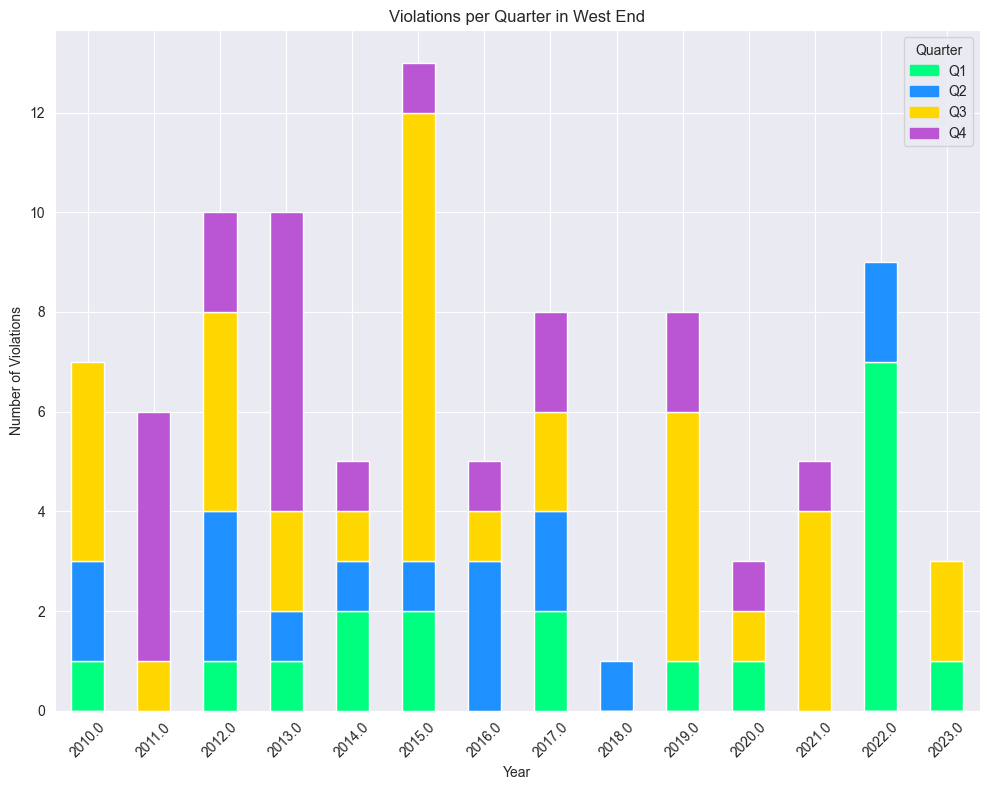

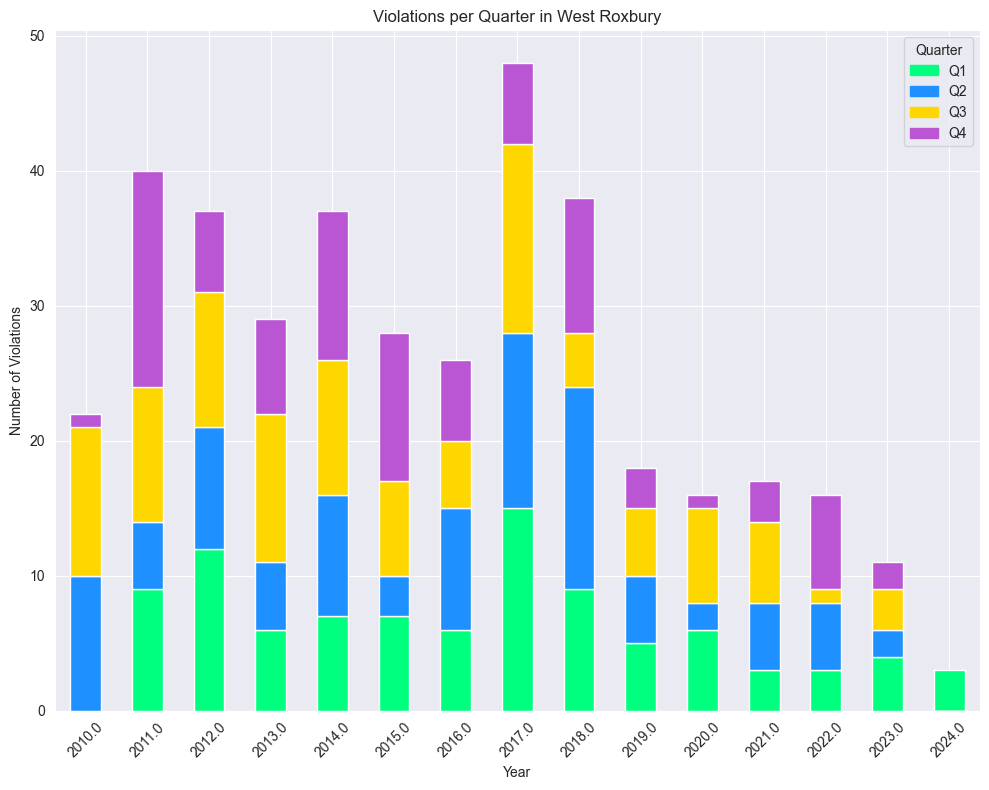

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the data
data_path = 'updated_PUBLIC_WORKS_VIOLATIONS.csv'
data = pd.read_csv(data_path)

# Convert 'status_dttm' to datetime and extract the 'Year' and 'Quarter'
data['status_dttm'] = pd.to_datetime(data['status_dttm'])
data['Year'] = data['status_dttm'].dt.year
data['Quarter'] = data['status_dttm'].dt.quarter

# Group the data by 'Neighborhood', 'Year', and 'Quarter' and count the violations
grouped = data.groupby(['Neighborhood', 'Year', 'Quarter']).size().reset_index(name='Violations')

# Get a sorted list of unique neighborhoods
neighborhoods = sorted(grouped['Neighborhood'].unique())

# Define a color map for the quarters
color_map = {1: 'springgreen', 2: 'dodgerblue', 3: 'gold', 4: 'mediumorchid'}

# Loop through each neighborhood to plot the data
for neighborhood in neighborhoods:
    neighborhood_group = grouped[grouped['Neighborhood'] == neighborhood]
    pivot_df = neighborhood_group.pivot(index='Year', columns='Quarter', values='Violations').fillna(0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size to make the plot taller

    # Map the Periods to integers and assign colors accordingly
    quarter_colors = [color_map[q] if q in color_map else 'grey' for q in pivot_df.columns]
    pivot_df.plot(kind='bar', stacked=True, ax=ax, color=quarter_colors, legend=False)

    # Add a custom legend for quarters
    legend_handles = [mpatches.Patch(color=color_map[q], label=f'Q{q}') for q in color_map]
    ax.legend(handles=legend_handles, title='Quarter')

    ax.set_title(f'Violations per Quarter in {neighborhood}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Violations')

    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot for each neighborhood

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
data = pd.read_csv('updated_PUBLIC_WORKS_VIOLATIONS.csv')

# Convert 'status_dttm' to datetime format
data['status_dttm'] = pd.to_datetime(data['status_dttm'])

# Extract quarter and year
data['Quarter'] = data['status_dttm'].dt.quarter
data['Year'] = data['status_dttm'].dt.year

# Now we create a count for each violation, so every row will be 1
data['Violation_Count'] = 1

# Group the data by Neighborhood and Quarter and sum the Violations
grouped_data = data.groupby(['Neighborhood', 'Quarter'])['Violation_Count'].sum().reset_index()

# Now we perform ANOVA with the sum of violations as the dependent variable
model = ols('Violation_Count ~ C(Quarter) + C(Neighborhood)', data=grouped_data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)


                     sum_sq    df           F        PR(>F)
C(Quarter)         15086.19   3.0    8.733475  5.145162e-05
C(Neighborhood)  3476531.96  24.0  251.572834  5.662629e-60
Residual           41457.56  72.0         NaN           NaN


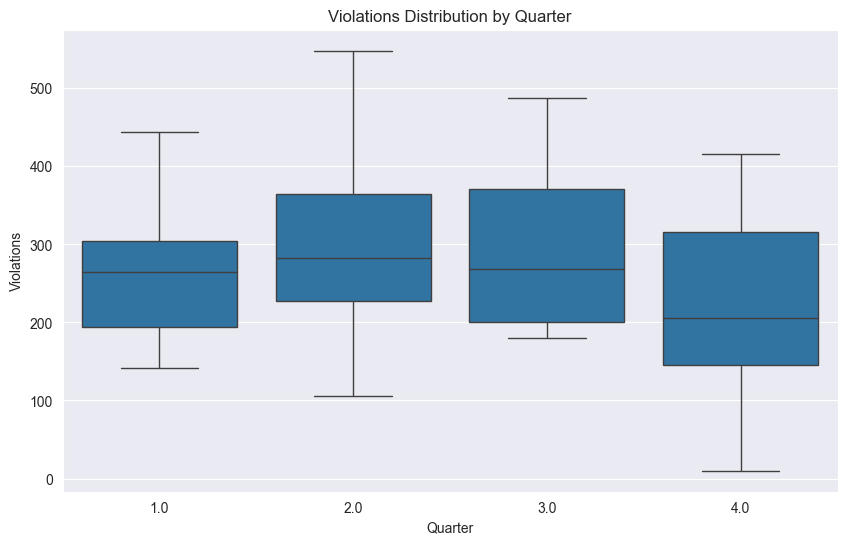

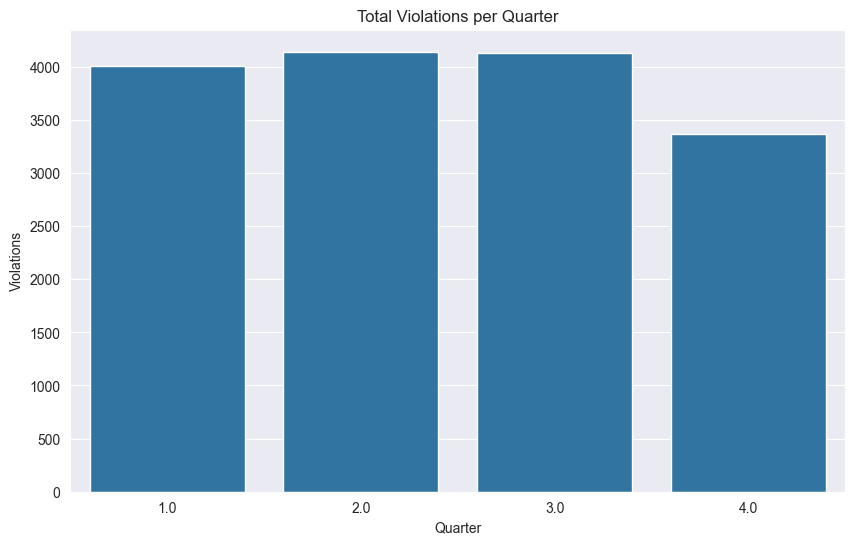

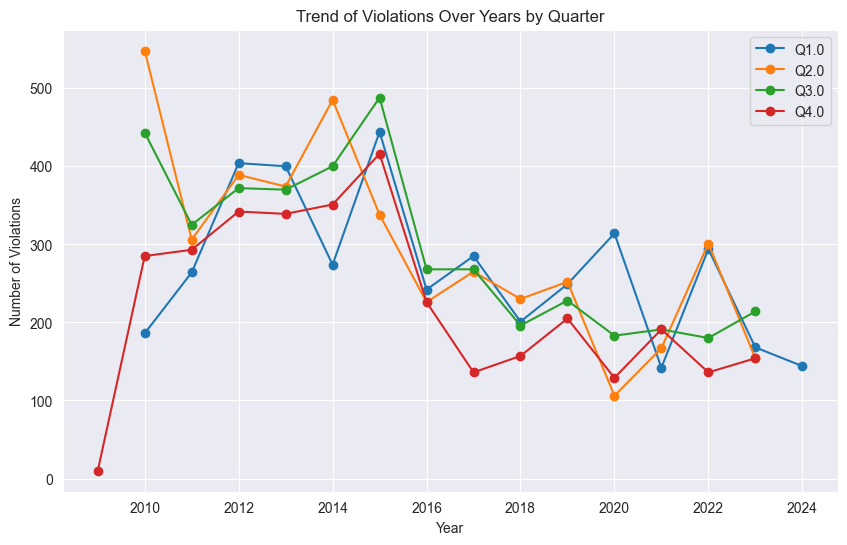

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
data = pd.read_csv('updated_PUBLIC_WORKS_VIOLATIONS.csv')

# Convert 'status_dttm' to datetime format
data['status_dttm'] = pd.to_datetime(data['status_dttm'])

# Extract quarter and year
data['Quarter'] = data['status_dttm'].dt.quarter
data['Year'] = data['status_dttm'].dt.year

# Count violations per Quarter and Year
quarterly_violations = data.groupby(['Year', 'Quarter']).size().reset_index(name='Violations')

# Boxplot for visualizing violations per Quarter
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quarter', y='Violations', data=quarterly_violations)
plt.title('Violations Distribution by Quarter')
plt.show()

# Bar Chart for total violations per Quarter
quarterly_totals = quarterly_violations.groupby('Quarter')['Violations'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Violations', data=quarterly_totals)
plt.title('Total Violations per Quarter')
plt.show()

# Line Chart for trend of violations over years per Quarter
plt.figure(figsize=(10, 6))
for quarter in sorted(quarterly_violations['Quarter'].unique()):
    subset = quarterly_violations[quarterly_violations['Quarter'] == quarter]
    plt.plot(subset['Year'], subset['Violations'], marker='o', label=f'Q{quarter}')
plt.legend()
plt.title('Trend of Violations Over Years by Quarter')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.show()
